In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
insurance_ds = pd.read_csv(r"D:\Data Science\Medical Cost Insurance\medical_cost_insurance (1).csv")
insurance_ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_ds.shape

(1338, 7)

In [5]:
insurance_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#find out the missing values of dataset

In [6]:
insurance_ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#describe of age value

<Figure size 600x600 with 0 Axes>

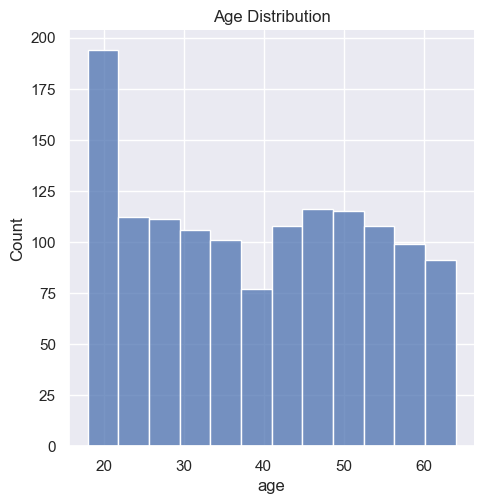

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_ds['age'])
plt.title('Age Distribution')
plt.show()

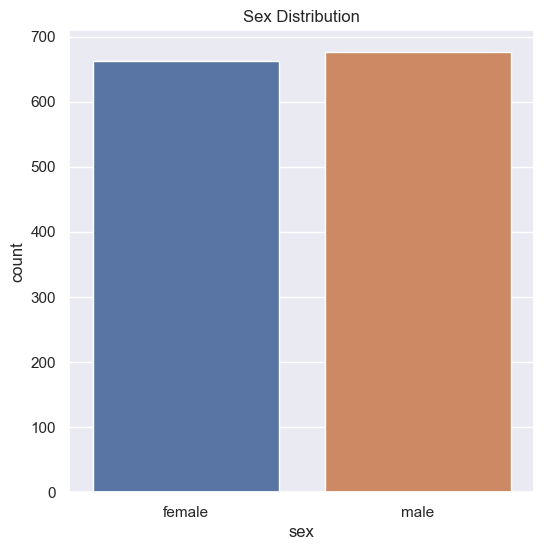

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_ds)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

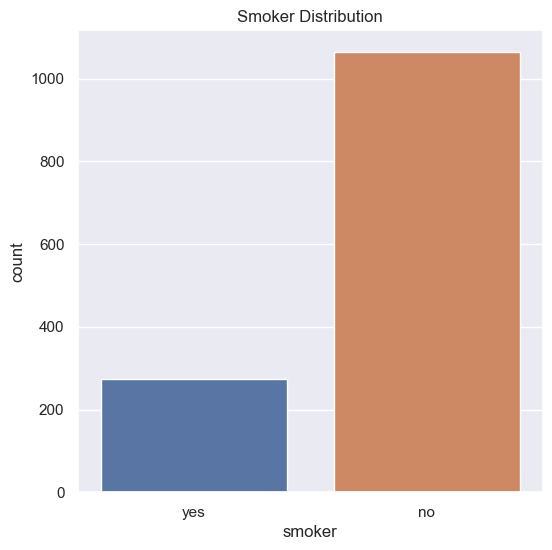

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_ds)
plt.title('Smoker Distribution')
plt.show()

In [13]:
insurance_ds['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Figure size 600x600 with 0 Axes>

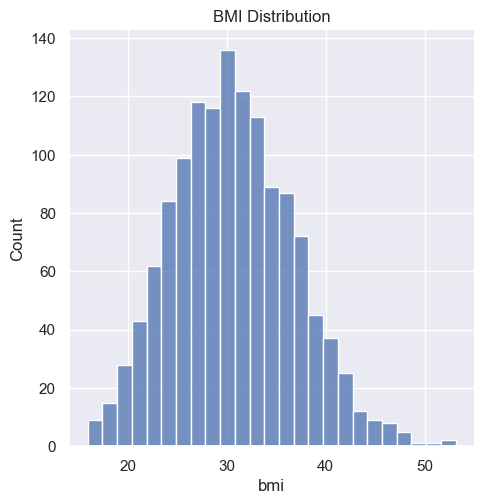

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_ds['bmi'])
plt.title('BMI Distribution')
plt.show()

In [15]:
insurance_ds['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

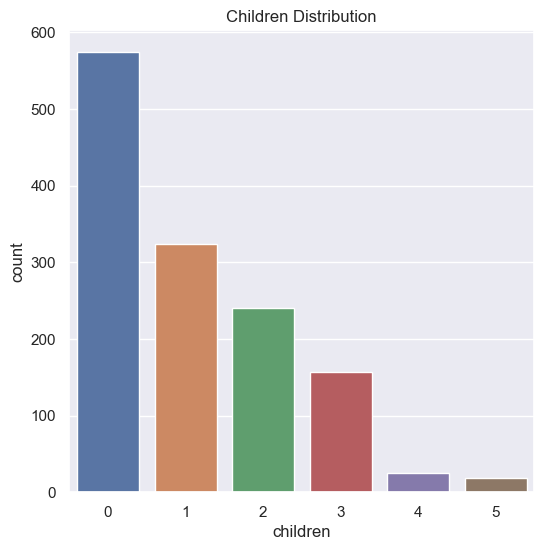

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_ds)
plt.title('Children Distribution')
plt.show()

In [16]:
insurance_ds['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

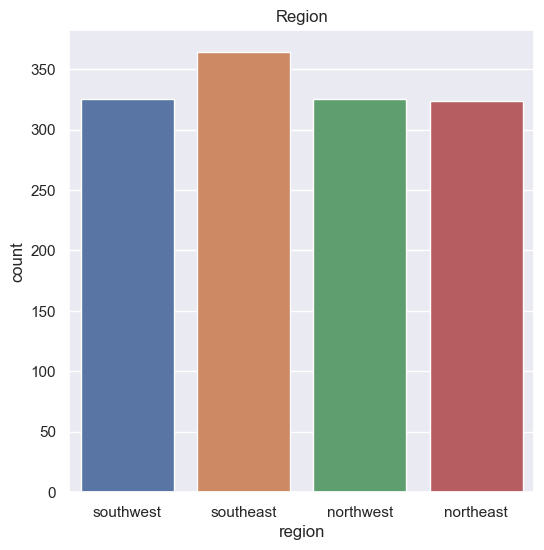

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'region', data=insurance_ds)
plt.title('Region')
plt.show()

In [30]:
insurance_ds['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

###### Data Preprocessing
#Encoding the Categorial Feature

In [17]:
insurance_ds.replace({'sex':{'male':0,'female':1}}, inplace= True)
insurance_ds.replace({'smoker':{'yes':0, 'no':1 }},inplace=True )
insurance_ds.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [18]:
insurance_ds

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [ ]:
#Spliting the Features & Target

In [19]:
X = insurance_ds.drop(columns='charges', axis=1)
Y = insurance_ds['charges']

In [20]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [21]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#spliting the data into training data & testing Data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2 )

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [34]:
regressor = LinearRegression()

In [37]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Model Evalution

In [ ]:
#prediction on training Data

In [38]:
training_data_predition =  regressor.predict(X_train)

In [39]:
# R Squared Value
r2_train = metrics.r2_score(Y_train, training_data_predition)

In [40]:
print('R squard val',r2_train )


R squard val 0.7518195459072954


In [ ]:
#prediction on test Data

In [41]:
training_data_predition =  regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, training_data_predition)

In [42]:
print('R squard val',r2_test)

R squard val 0.7454471618659975


In [ ]:
#Building a predictive System

In [50]:
input_data = (56,1,39.82,0,1,0)

In [51]:
# Changing input data into numpy array

In [52]:
input_data_as_numpy_array = np.asarray(input_data)

In [53]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [56]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[14621.74309785]


C:\Users\milan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
prediction

array([14621.74309785])